In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
register_matplotlib_converters()
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from itertools import combinations
from statsmodels.tsa.arima_model import ARIMA as ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

plt.rcParams["figure.figsize"] = [16,9]

E:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
series = pd.read_csv('testset.csv')
series['datetime'] = pd.to_datetime(series['datetime'].apply(lambda x: datetime.strptime(x, "%Y%m%d-%H:%M").strftime("%Y%m%d %H:%M")))
series = series.set_index('datetime', drop = True)
series.index.name = 'datetime'
series = series['2001':]

series = series.resample('M').mean().interpolate()
series = series.Temperature

In [3]:
series_diff = series.diff(12)
series_diff = series_diff.dropna()

In [4]:
def acfpacf(y, lags = None, figsize = (12, 7), style = 'bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax = ts_ax)
        p_value = adfuller(y)[1]
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

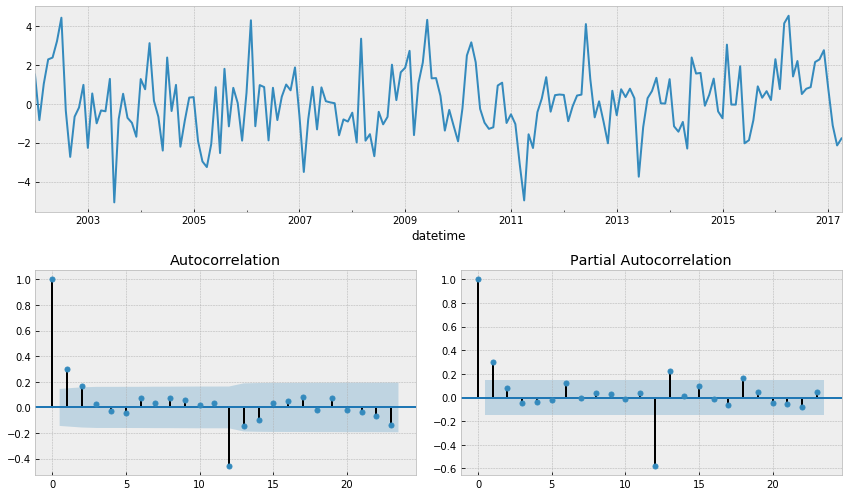

In [5]:
acfpacf(series_diff)

E:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


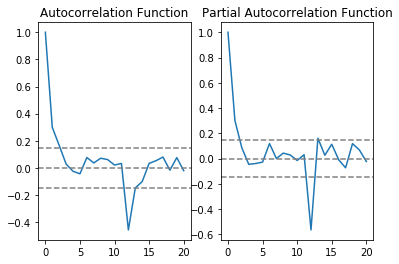

<Figure size 1152x1008 with 0 Axes>

In [6]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(series_diff, nlags = 20)
lag_pacf = pacf(series_diff, nlags = 20, method = 'ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(series_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(series_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(series_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.figure(figsize = (16, 14))
plt.tight_layout()

                             ARIMA Model Results                              
Dep. Variable:          D.Temperature   No. Observations:                  183
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -353.456
Method:                       css-mle   S.D. of innovations              1.649
Date:                Thu, 20 Aug 2020   AIC                            714.912
Time:                        20:29:01   BIC                            727.750
Sample:                    02-28-2002   HQIC                           720.116
                         - 04-30-2017                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0034      0.003      1.046      0.297      -0.003       0.010
ar.L1.D.Temperature     0.2977      0.071      4.168      0.000       0.158       0.438
ma.L1.D.Temperat

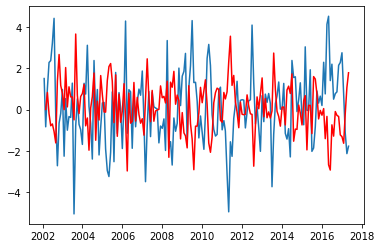

In [7]:
model = ARIMA(series_diff, order = (1, 1, 1))
results_ARIMA = model.fit(disp = -1)
plt.plot(series_diff)
plt.plot(results_ARIMA.fittedvalues, color = 'red')

print(results_ARIMA.summary())

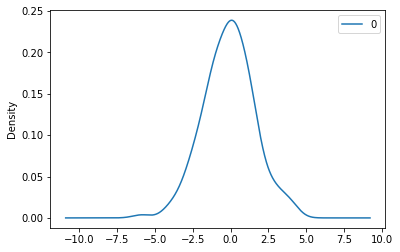

In [8]:
residuals = pd.DataFrame(results_ARIMA.resid)
residuals.plot(kind = 'kde')
plt.show()

In [9]:
print(residuals.describe())

                0
count  183.000000
mean    -0.111767
std      1.674307
min     -5.852388
25%     -1.121694
50%     -0.107277
75%      0.994630
max      4.181513


E:\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.Temperature   No. Observations:                  183
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -342.836
Method:                       css-mle   S.D. of innovations              1.534
Date:                Thu, 20 Aug 2020   AIC                            701.672
Time:                        20:29:02   BIC                            727.347
Sample:                    02-28-2002   HQIC                           712.079
                         - 04-30-2017                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0034      0.003      1.009      0.314      -0.003       0.010
ar.L1.D.Temperature     0.3248      0.077      4.208      0.000       0.174       0.476
ar.L2.D.Temperat

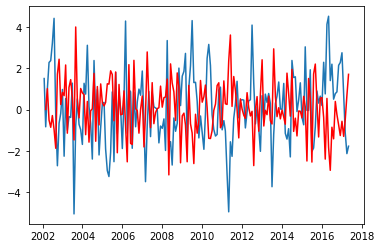

In [10]:
model = ARIMA(series_diff, order = (3, 1, 3))
results_ARIMA = model.fit(disp = -1)
plt.plot(series_diff)
plt.plot(results_ARIMA.fittedvalues, color = 'red')

print(results_ARIMA.summary())

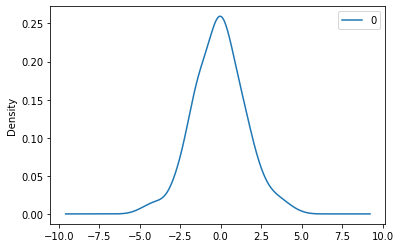

In [11]:
residuals = pd.DataFrame(results_ARIMA.resid)
residuals.plot(kind = 'kde')
plt.show()

In [12]:
print(residuals.describe())

                0
count  183.000000
mean    -0.100177
std      1.585175
min     -4.875140
25%     -1.196254
50%     -0.107139
75%      0.859720
max      4.527902


In [13]:
pred = pd.Series(results_ARIMA.fittedvalues, copy = True)
pred

datetime
2002-02-28    0.003398
2002-03-31    1.014460
2002-04-30   -0.513173
2002-05-31   -0.863807
2002-06-30   -0.294082
                ...   
2016-12-31   -0.571561
2017-01-31   -1.305405
2017-02-28   -0.523512
2017-03-31    0.675337
2017-04-30    1.709460
Freq: M, Length: 183, dtype: float64

In [14]:
pred_sum = pred.cumsum()
pred_sum

datetime
2002-02-28     0.003398
2002-03-31     1.017857
2002-04-30     0.504684
2002-05-31    -0.359123
2002-06-30    -0.653205
                ...    
2016-12-31    14.488327
2017-01-31    13.182922
2017-02-28    12.659410
2017-03-31    13.334747
2017-04-30    15.044207
Freq: M, Length: 183, dtype: float64

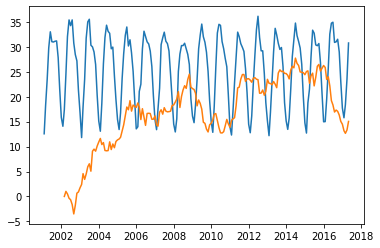

In [15]:
plt.plot(series)
plt.plot(pred_sum)